In [36]:
from probatus.feature_elimination import ShapRFECV
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import pandas as pd
import lightgbm
from sklearn.model_selection import RandomizedSearchCV

# Prepare two samples
X, y = make_classification(n_samples=1000, class_sep=0.05, n_informative=6, n_features=20,
                           random_state=0, n_redundant=4, n_clusters_per_class=1)



In [46]:
#clf = lightgbm.LGBMClassifier(max_depth=5, class_weight='balanced')
clf = RandomForestClassifier(n_estimators=1000)


In [41]:
shap_elimination = ShapRFECV(
    clf=clf, step=0.2, cv=5, scoring='roc_auc', n_jobs=6, verbose=100)
report = shap_elimination.fit_compute(X, y)


 98%|===================| 390/400 [00:31<00:00]        

Round: 1, Current number of features: 20, Current performance: Train 1.0 +/- 0.0, CV Validation 0.943 +/- 0.014. 
Features left: [0, 1, 2, 3, 4, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18]. Removed features at the end of the round: [19, 5, 12, 6]


 98%|===================| 391/400 [00:30<00:00]        

Round: 2, Current number of features: 16, Current performance: Train 1.0 +/- 0.0, CV Validation 0.951 +/- 0.013. 
Features left: [0, 2, 3, 4, 7, 8, 9, 10, 11, 14, 16, 17, 18]. Removed features at the end of the round: [15, 13, 1]


 97%|=================== | 389/400 [00:30<00:00]       

Round: 3, Current number of features: 13, Current performance: Train 1.0 +/- 0.0, CV Validation 0.955 +/- 0.013. 
Features left: [0, 2, 3, 4, 7, 8, 10, 11, 14, 16, 17]. Removed features at the end of the round: [18, 9]


100%|===================| 398/400 [00:29<00:00]        

Round: 4, Current number of features: 11, Current performance: Train 1.0 +/- 0.0, CV Validation 0.961 +/- 0.014. 
Features left: [0, 3, 4, 7, 8, 10, 11, 14, 16]. Removed features at the end of the round: [17, 2]


 99%|===================| 397/400 [00:28<00:00]        

Round: 5, Current number of features: 9, Current performance: Train 1.0 +/- 0.0, CV Validation 0.962 +/- 0.015. 
Features left: [0, 3, 7, 8, 10, 11, 14, 16]. Removed features at the end of the round: [4]


 99%|===================| 397/400 [00:29<00:00]        

Round: 6, Current number of features: 8, Current performance: Train 1.0 +/- 0.0, CV Validation 0.951 +/- 0.017. 
Features left: [3, 7, 8, 10, 11, 14, 16]. Removed features at the end of the round: [0]


 99%|===================| 397/400 [00:30<00:00]        

Round: 7, Current number of features: 7, Current performance: Train 1.0 +/- 0.0, CV Validation 0.941 +/- 0.016. 
Features left: [7, 8, 10, 11, 14, 16]. Removed features at the end of the round: [3]


100%|===================| 399/400 [00:28<00:00]        

Round: 8, Current number of features: 6, Current performance: Train 1.0 +/- 0.0, CV Validation 0.939 +/- 0.017. 
Features left: [7, 8, 10, 11, 14]. Removed features at the end of the round: [16]


 98%|===================| 393/400 [00:27<00:00]        

Round: 9, Current number of features: 5, Current performance: Train 1.0 +/- 0.0, CV Validation 0.942 +/- 0.017. 
Features left: [8, 10, 11, 14]. Removed features at the end of the round: [7]


 97%|=================== | 388/400 [00:24<00:00]       

Round: 10, Current number of features: 4, Current performance: Train 1.0 +/- 0.0, CV Validation 0.932 +/- 0.015. 
Features left: [8, 10, 14]. Removed features at the end of the round: [11]


 98%|===================| 394/400 [00:25<00:00]        

Round: 11, Current number of features: 3, Current performance: Train 1.0 +/- 0.0, CV Validation 0.9 +/- 0.02. 
Features left: [8, 10]. Removed features at the end of the round: [14]


 99%|===================| 396/400 [00:21<00:00]        

Round: 12, Current number of features: 2, Current performance: Train 1.0 +/- 0.0, CV Validation 0.844 +/- 0.031. 
Features left: [8]. Removed features at the end of the round: [10]


 98%|===================| 393/400 [00:16<00:00]        

Round: 13, Current number of features: 1, Current performance: Train 1.0 +/- 0.0, CV Validation 0.737 +/- 0.031. 
Features left: [8]. Removed features at the end of the round: []


In [47]:
#First 5 rows of first 5 columns
report[['num_features', 'features_set', 'val_metric_mean']]


,num_features,features_set,val_metric_mean
1,20,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",0.943
2,16,"[0, 1, 2, 3, 4, 7, 8, 9, 10, 11, 13, 14, 15, 1...",0.951
3,13,"[0, 2, 3, 4, 7, 8, 9, 10, 11, 14, 16, 17, 18]",0.955
4,11,"[0, 2, 3, 4, 7, 8, 10, 11, 14, 16, 17]",0.961
5,9,"[0, 3, 4, 7, 8, 10, 11, 14, 16]",0.962
6,8,"[0, 3, 7, 8, 10, 11, 14, 16]",0.951
7,7,"[3, 7, 8, 10, 11, 14, 16]",0.941
8,6,"[7, 8, 10, 11, 14, 16]",0.939
9,5,"[7, 8, 10, 11, 14]",0.942
10,4,"[8, 10, 11, 14]",0.932


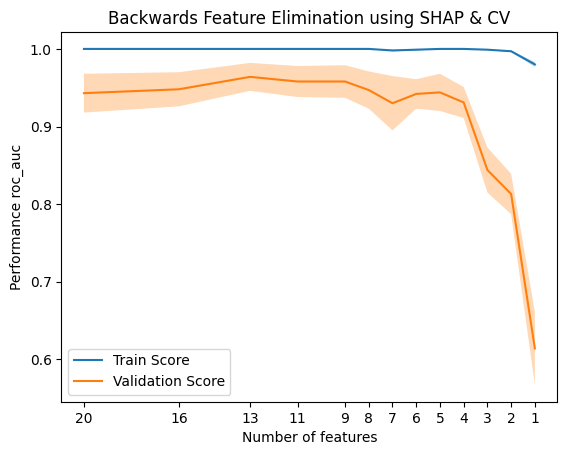

In [29]:
performance_plot = shap_elimination.plot()

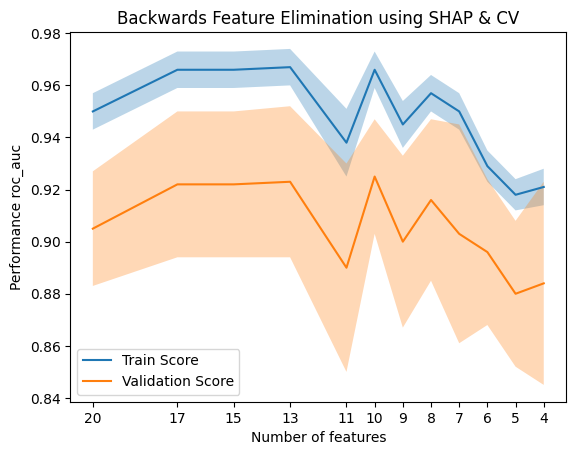

In [14]:
shap_elimination = ShapRFECV(
    clf=search, step=0.2, cv=10, scoring='roc_auc', n_jobs=3, min_features_to_select=4)
report = shap_elimination.fit_compute(X, y, columns_to_keep=['f10','f15','f19'])

performance_plot = shap_elimination.plot()


In [17]:
shap_elimination.clf.

{'cv': None,
 'error_score': nan,
 'estimator__boosting_type': 'gbdt',
 'estimator__class_weight': 'balanced',
 'estimator__colsample_bytree': 1.0,
 'estimator__importance_type': 'split',
 'estimator__learning_rate': 0.1,
 'estimator__max_depth': 5,
 'estimator__min_child_samples': 20,
 'estimator__min_child_weight': 0.001,
 'estimator__min_split_gain': 0.0,
 'estimator__n_estimators': 100,
 'estimator__n_jobs': -1,
 'estimator__num_leaves': 31,
 'estimator__objective': None,
 'estimator__random_state': None,
 'estimator__reg_alpha': 0.0,
 'estimator__reg_lambda': 0.0,
 'estimator__silent': 'warn',
 'estimator__subsample': 1.0,
 'estimator__subsample_for_bin': 200000,
 'estimator__subsample_freq': 0,
 'estimator': LGBMClassifier(class_weight='balanced', max_depth=5),
 'n_iter': 10,
 'n_jobs': None,
 'param_distributions': {'n_estimators': [5, 7, 10],
  'num_leaves': [3, 5, 7, 10]},
 'pre_dispatch': '2*n_jobs',
 'random_state': None,
 'refit': True,
 'return_train_score': False,
 'scori

In [42]:
from sklearn.feature_selection import RFECV

In [44]:
rfecv = RFECV(clf, step=0.2, cv=5, scoring='roc_auc', verbose=2)
rfecv.fit(X, y)

Fitting estimator with 20 features.
Fitting estimator with 16 features.
Fitting estimator with 12 features.
Fitting estimator with 8 features.
Fitting estimator with 4 features.
Fitting estimator with 20 features.
Fitting estimator with 16 features.
Fitting estimator with 12 features.
Fitting estimator with 8 features.
Fitting estimator with 4 features.
Fitting estimator with 20 features.
Fitting estimator with 16 features.
Fitting estimator with 12 features.
Fitting estimator with 8 features.
Fitting estimator with 4 features.
Fitting estimator with 20 features.
Fitting estimator with 16 features.
Fitting estimator with 12 features.
Fitting estimator with 8 features.
Fitting estimator with 4 features.
Fitting estimator with 20 features.
Fitting estimator with 16 features.
Fitting estimator with 12 features.
Fitting estimator with 8 features.
Fitting estimator with 4 features.
Fitting estimator with 20 features.
Fitting estimator with 16 features.
Fitting estimator with 12 features.


RFECV(cv=5, estimator=RandomForestClassifier(n_estimators=1000),
      scoring='roc_auc', step=0.2, verbose=2)

In [45]:
rfecv.ranking_

array([1, 3, 2, 1, 2, 3, 4, 1, 1, 2, 1, 1, 4, 4, 1, 3, 1, 2, 3, 4])

In [ ]:
[0, 3, 4, 7, 8, 10, 11, 14, 16]	